# Assignement 1 Report - Airport and Flight Database

#### Anja Deric and Karan Soni

For this assignment, ww created a database for flights and airports. We used 3 different sources to extract data- a web scraper, an API, and a raw csv file. After extracting and cleaning up our data, we combined and organized it into 2 data sets: one file with a list of top 30 airports in the world and information about each, and one file with a list of flights and relevant information about each.

Image below depicts the conceptual model for our database. We used our API to gether flight data, and a web scraper and raw csv file to gather airport data.

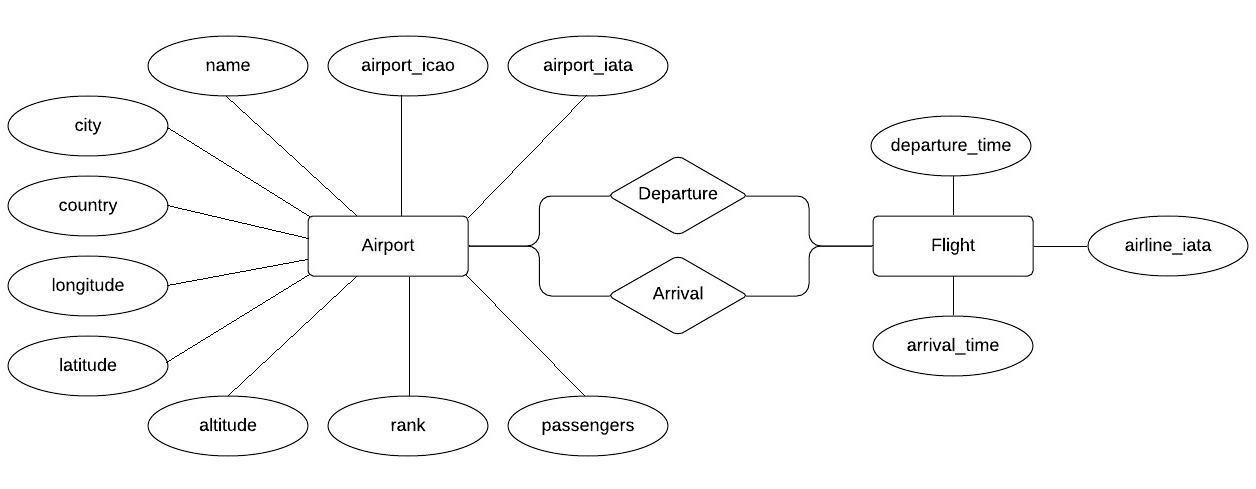

In [1]:
from IPython.display import Image
Image(r'C:\Users\anja\Downloads\conceptualmodel.jpg')

We started the assignment off by importing all libraries that we would be using thorughout the assignment. We used the requests library to gather data from an API, the json library to format data for easier handling, and the pandas library to manipulate and audit the data. We also imported the urlopne function from urllib.request and BeautifulSoup function from the bs4 library for the web scraping part of the assignment.

In [2]:
import requests
import json
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup

###  Data Source 1: Web Scraper

We started the web scraping part of the assignment by searching for a website that contains information about world airports. We found one website which ranks the top 30 busiest airports in the world by the total number of passangers. We then copied this website url and used it to scrape the website using urlopen() and BeautifulSoup() functions.

In [3]:
# Website URL
url='https://www.world-airport-codes.com/world-top-30-airports.html'

# Open desired website
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

Next, we extracted the title of the website to confirm that we were getting the right data.

In [4]:
# Extract title of website
title = soup.title 
titleText = title.get_text()
print(titleText)

List of Top 30 Airports in the World - World Airport Codes


We were then able to use the get() function to get the full content of the website, which includes all the information form the table that ranks the airports.

In [5]:
# Get full content of website without formatting
req = requests.get("https://www.world-airport-codes.com/world-top-30-airports.html", headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
cont = req.content
cont

b'<!DOCTYPE html>\n<html lang="en-US" prefix="og: http://ogp.me/ns#">\n<head >\n<meta charset="UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<link rel="stylesheet" href="https://www.world-airport-codes.com/content/themes/wac-genesis-child/dist/style.min.css?v=0.1.3" type="text/css" media="screen" />\t<script type="text/javascript">function theChampLoadEvent(e){var t=window.onload;if(typeof window.onload!="function"){window.onload=e}else{window.onload=function(){t();e()}}}</script>\r\n\t\t<script type="text/javascript">var theChampDefaultLang = \'en_US\', theChampCloseIconPath = \'https://www.world-airport-codes.com/content/plugins/super-socializer/images/close.png\';</script>\r\n\t\t<script> var theChampSiteUrl = \'https://www.world-airport-codes.com\', theChampVerified = 0, theChampEmailPopup = 0; </script>\r\n\t\t<style type="text/css">.the_champ_horizontal_sharing .theChampSharing{\r\n\t\t\t\t\tcolor: #fff;\r\n\t\t\t\tborder-width: 0px;\r\n\t\tbo

Before moving forward, we used the prettify attribute and html parser to make the html from the website more readable.

In [6]:
# Format data into more readable form
soup = BeautifulSoup(cont,"html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en-US" prefix="og: http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://www.world-airport-codes.com/content/themes/wac-genesis-child/dist/style.min.css?v=0.1.3" media="screen" rel="stylesheet" type="text/css"/> <script type="text/javascript">function theChampLoadEvent(e){var t=window.onload;if(typeof window.onload!="function"){window.onload=e}else{window.onload=function(){t();e()}}}</script>
<script type="text/javascript">var theChampDefaultLang = 'en_US', theChampCloseIconPath = 'https://www.world-airport-codes.com/content/plugins/super-socializer/images/close.png';</script>
<script> var theChampSiteUrl = 'https://www.world-airport-codes.com', theChampVerified = 0, theChampEmailPopup = 0; </script>
<style type="text/css">.the_champ_horizontal_sharing .theChampSharing{
					color: #fff;
				border-width: 0px;
		border-style: solid;
		border-

Next, we found the specific html tag that enclosed all the data we needed, and we used the find_all() function to extract that part of the website.

In [7]:
# Find table to extract data from
table = soup.find_all("table",{"class":"wikitable sortable"})
print(table)

[<table class="wikitable sortable" style="font-size: 85%" width="align="> <tbody><tr style="background:lightgrey;"> <th style="background-color: lightgrey">Rank</th> <th style="background-color: lightgrey">Airport</th> <th style="background-color: lightgrey">Location</th> <th style="background-color: lightgrey">Country</th> <th style="background-color: lightgrey">Code<br>(IATA/ICAO)</br></th> <th style="background-color: lightgrey">Half-year<br/>passengers</th> <th style="background-color: lightgrey">Rank<br/>change</th> <th style="background-color: lightgrey">%<br/>Change </th></tr> <tr> <td>1.</td> <td><span class="flagicon"><a href="https://www.world-airport-codes.com/united-states/hartsfield-jackson-atlanta-international-428.html" title="United States"><img alt="United States" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.

To confirm we have the right data, we used the read_html() function to get the table in a list form. Following that, we immediately converted the table into a data frame for easier manipulation of the data. 

In [8]:
# Read all table entries
table_list = pd.read_html(str(table))
table_df = table_list[0]
table_df

,Rank,Airport,Location,Country,Code(IATA/ICAO),Half-yearpassengers,Rankchange,%Change
0,1.0,Hartsfield–Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,54388000.0,NaN,3.3%
1,2.0,Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,49242000.0,NaN,0.6%
2,3.0,Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,43049000.0,1.0,0.9%
3,4.0,Tokyo Haneda Airport,"Ōta, Tokyo",Japan,HND/RJTT,41435000.0,1.0,1.1%
4,5.0,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,41278000.0,2.0,5.6%
5,6.0,O'Hare International Airport,"Chicago, Illinois",United States,ORD/KORD,39512000.0,NaN,2.8%
6,7.0,London Heathrow Airport,"Hillingdon, London",United Kingdom,LHR/EGLL,38750000.0,NaN,1.8%
7,8.0,Shanghai Pudong International Airport,"Pudong, Shanghai",China,PVG/ZSPD,38220000.0,1.0,4.2%
8,9.0,Hong Kong International Airport,"Chek Lap Kok, Islands, New Territories","Hong Kong SAR, China",HKG/VHHH,37800000.0,1.0,2.5%
9,10.0,Paris-Charles de Gaulle Airport,"Roissy-en-France, Île-de-France",France,CDG/LFPG,36339000.0,NaN,7.2%


We did not export this data to its own csv file because we wanted to extract and connect some of its items to the data we got from a raw data file (next section of report). More specifically, we wanted to add rank and half-year passanger values of the top 30 airports to the raw data csv file.

To narrow down the data necessary for this, we started by getting all the ICAO codes from the table and converting them into a list since this was our primary key. Since the Code column in the table had both the IATA and the ICAO code for each airport (in the format IATA/ICAO), we had to use the split('/') function in order to extract only the ICAO code for each airport.

In [9]:
# Get column with all codes in IATA code/ICAO code format and convert to list
all_codes = table_df['Code(IATA/ICAO)'].to_numpy()

# Extract only IATA code from each string
icao_codes = []
for code in all_codes:
    split_code = code.split('/')
    icao_code = split_code[1]
    icao_codes.append(icao_code)
    
# Print IATA codes to confirm success
print(icao_codes)

['KATL', 'ZBAA', 'KLAX', 'RJTT', 'OMDB', 'KORD', 'EGLL', 'ZSPD', 'VHHH', 'LFPG', 'KDFW', 'ZGGG', 'RKSI', 'EHAM', 'EDDF', 'WSSS', 'VTBS', 'KDEN', 'VIDP', 'WIII', 'KJFK', 'WMKK', 'LEMD', 'KSFO', 'ZUUU', 'ZGSZ', 'KMCO', 'KLAS', 'LEBL', 'CYYZ']


After extracting the ICAO codes, we added them to the data frame as our primary key, and then we dropped all the colums from the table that we wouldn't need using the drop() function. We decided to drop the airport name, location, and country since that data could be found in the raw csv file we would be using in the next section.

In [10]:
# Add ICAO codes only to table
table_df['ICAO'] = icao_codes

# Drop unnecessary columns and reorder and rename existing columns
table_df.drop(['Airport','Location','Country','Code(IATA/ICAO)','Rankchange','%Change'], inplace=True, axis = 1)
table_df = table_df[['ICAO','Rank','Half-yearpassengers']]
table_df.rename(columns = {'Half-yearpassengers':'half_year_count'}, inplace = True)
table_df

,ICAO,Rank,half_year_count
0,KATL,1.0,54388000.0
1,ZBAA,2.0,49242000.0
2,KLAX,3.0,43049000.0
3,RJTT,4.0,41435000.0
4,OMDB,5.0,41278000.0
5,KORD,6.0,39512000.0
6,EGLL,7.0,38750000.0
7,ZSPD,8.0,38220000.0
8,VHHH,9.0,37800000.0
9,LFPG,10.0,36339000.0


Once we had all the ICAO code, rank, and half-year passenger information for the top 30 airports, we were ready to move to the next portion of the assignment.

### Data Source 2: Raw Data File

For our second source of data, we found a file, linked [here](https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat) containing raw data about airports around the world. In order to use this data in our program, we first had to save it as a csv file.

In [11]:
# URL and csv path for file
download_url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
target_csv_path = "raw-data-1.csv"

We then used the get() function from the requests library to collect the data from the website. After making sure that the request was successful, we were able to save that information to a csv file using the wrtie() function.

In [12]:
# Get data from website and confirm success
response = requests.get(download_url)
response.raise_for_status() 

# Save data to csv file
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("File saved!")

File saved!


After saving the file, we loaded it in using the read_csv() function form pandas.

In [13]:
# Load data in and define column names
all_airport_data = pd.read_csv("raw-data-1.csv")
all_airport_data.columns = ['id', 'name', 'city', 'country', 'IATA', 'ICAO', 'longitude', 'latitude', 'altitude', 'tz', 'DST', 'timezone', 'type','source']

Next, we checked the first few lines of our newly imported data using the head() function. We confirmed that the data was brough in successfullys since the first few airports and their corresponding information were printed as expected.

In [14]:
all_airport_data.head()

,id,name,city,country,IATA,ICAO,longitude,latitude,altitude,tz,DST,timezone,type,source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports


Before auditing and adding to our data, we decided to drop any attributes/columns that we didn't need in our table.

In [15]:
# Drop attributes that we don't need 
all_airport_data.drop(['id','type','source','tz','DST','timezone'], inplace=True, axis = 1)

We also rearranged the columns of our data frame so that our primary key (the ICAO code) is in the first column.

In [16]:
all_airport_data = all_airport_data[['ICAO','IATA','name','city','country','longitude','latitude','altitude']]

To confirm that our table had everything we wanted, we used the .shape attribute and .head() function to check the size of the table and inspect the first few elements.

In [17]:
# Check shape to make sure it matches csv file
all_airport_data.shape

(7697, 8)

In [18]:
# Inspect first few elements
all_airport_data.head()

,ICAO,IATA,name,city,country,longitude,latitude,altitude
0,AYMD,MAG,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,20
1,AYMH,HGU,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,5388
2,AYNZ,LAE,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,239
3,AYPY,POM,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,146
4,AYWK,WWK,Wewak International Airport,Wewak,Papua New Guinea,-3.583830,143.669006,19


Next, we were ready to combine the new table with the rank and passenger information from the first portion of the assignment.
In order to find rows in our data table that the top 30 airports were located in, we used the .loc and .index attribute for data frames. We stored row numbers for each of the top 30 airports in a list called top_30_index.

In [20]:
# Locate top 30 airports
top_30_index = []

# Loop through top 30 IATA codes and locate row that those airports are in
for icao in icao_codes:
    index = all_airport_data.loc[all_airport_data['ICAO']==icao].index
    top_30_index.append(index[0]) 

# Print row location of top 30 airports
print(top_30_index)

[3481, 3169, 3284, 2256, 2099, 3629, 501, 3206, 2914, 1345, 3469, 3173, 3724, 573, 335, 3123, 3684, 3550, 2930, 3087, 3596, 3111, 1195, 3269, 3198, 3177, 3677, 3676, 1185, 190]


After finding the row values for top 30 airports, we made a new data frame which only contained information on those 30 airports. We used the drop() function to remove all other airports from the list.

In [21]:
# Make new data frame for top 30 airports only
top_airports = all_airport_data

# Loop thorugh all airports in the csv file
for row in range(0,all_airport_data.shape[0]):
    # Drop any airports not on the top 30 list
    if row not in top_30_index:
        top_airports.drop(row, axis=0, inplace=True)
        
top_airports.head()

,ICAO,IATA,name,city,country,longitude,latitude,altitude
190,CYYZ,YYZ,Lester B. Pearson International Airport,Toronto,Canada,43.677200,-79.630600,569
335,EDDF,FRA,Frankfurt am Main Airport,Frankfurt,Germany,50.033333,8.570556,364
501,EGLL,LHR,London Heathrow Airport,London,United Kingdom,51.470600,-0.461941,83
573,EHAM,AMS,Amsterdam Airport Schiphol,Amsterdam,Netherlands,52.308601,4.763890,-11
1185,LEBL,BCN,Barcelona International Airport,Barcelona,Spain,41.297100,2.078460,12


Lastly, in order to combine our two data sources, we used the pandas merge() function and merged the two frames based on the ICAO airport code (our primary key).

In [23]:
# Combine rank and half-year passanger data with top airport information based on ICAO code
top_airport_data_combined = pd.merge(top_airports,table_df,left_on='ICAO',right_on='ICAO')
top_airport_data_combined

,ICAO,IATA,name,city,country,longitude,latitude,altitude,Rank,half_year_count
0,CYYZ,YYZ,Lester B. Pearson International Airport,Toronto,Canada,43.677200,-79.630600,569,30.0,24463000.0
1,EDDF,FRA,Frankfurt am Main Airport,Frankfurt,Germany,50.033333,8.570556,364,15.0,33644000.0
2,EGLL,LHR,London Heathrow Airport,London,United Kingdom,51.470600,-0.461941,83,7.0,38750000.0
3,EHAM,AMS,Amsterdam Airport Schiphol,Amsterdam,Netherlands,52.308601,4.763890,-11,14.0,34537000.0
4,LEBL,BCN,Barcelona International Airport,Barcelona,Spain,41.297100,2.078460,12,29.0,24821000.0
5,LEMD,MAD,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,40.471926,-3.562640,1998,23.0,29284000.0
6,LFPG,CDG,Charles de Gaulle International Airport,Paris,France,49.012798,2.550000,392,10.0,36339000.0
7,OMDB,DXB,Dubai International Airport,Dubai,United Arab Emirates,25.252800,55.364399,62,5.0,41278000.0
8,RJTT,HND,Tokyo Haneda International Airport,Tokyo,Japan,35.552299,139.779999,35,4.0,41435000.0
9,VHHH,HKG,Hong Kong International Airport,Hong Kong,Hong Kong,22.308901,113.915001,28,9.0,37800000.0


To audit our data, we used the .shape attribute to once again make sure we had top 30 airports only.

In [24]:
top_airport_data_combined.shape

(30, 10)

We then used the info() and isnull() functions to check for completeness and consistency.

In [25]:
# Make sure all attributes present for all airports
top_airport_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
ICAO               30 non-null object
IATA               30 non-null object
name               30 non-null object
city               30 non-null object
country            30 non-null object
longitude          30 non-null float64
latitude           30 non-null float64
altitude           30 non-null int64
Rank               30 non-null float64
half_year_count    29 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.6+ KB


In [26]:
 # Make sure no null attributes present   
top_airport_data_combined.isnull().any()

ICAO               False
IATA               False
name               False
city               False
country            False
longitude          False
latitude           False
altitude           False
Rank               False
half_year_count     True
dtype: bool

We additionally made sure that our primary key was, in fact, unique for each airport listed.

In [27]:
top_airport_data_combined['ICAO'].is_unique

True

Based on the results, we noticed that one airport listed in the top 30 did not have information about it's half-year passenger value. Looking back at the table we scraped, we noticed that the table was missing that value as well. Consequently, we decided to still keep that row in the data table since the rest of our data was complete and consistent. If the row presented an issue or was missing critical information, we would've used the dropna() function to remove it from the list.

As a last step, we saved our data to a cvs file named top_airports.

In [28]:
# Writing the formatted and corrected data to a csv file
top_airport_data_combined.to_csv(r'C:\Users\anja\Documents\top_airports.csv')

### Data Source 3: Using an API

For the API part of the assignment, we decided to use the aviationstack API, which provides flight data, as well as airline, airport, and many other types of data. We were able to get an access key by signing up on their website, which gave us access to a large portion of the API features (some are restricted to paid users only).

We started our search by defining parameters in order to narrow down the results of our request. We settled on requesting data for 100 flights in total. We also decided to only look at flights that have landed, and we chose to focus on flights departing the Atlanta airport (#1 airport from our top 30 list). As mentioned, we took these steps and chose this paramaters so as to narrow down out data set and make it more digestible.

In [29]:
# Define earch parameters for request
params = {
    'access_key': '21a3ed98c94fcf48fac648f24e8541c4',
    'limit': 100,
    'flight_status': "landed",
    'dep_icao': icao_codes[0]
}

After defining our search, we used the get() method from the requests library in order to communicate with the API and get our data. We also immediately converted this response into json format using the json() function.

In [30]:
# Make an API request and convert data to json
api_response = requests.get('http://api.aviationstack.com/v1/flights', params)
all_flight_data = api_response.json()

To confirm that the response made sense, we printed unflitered and unprocessed version of it.

In [31]:
print(all_flight_data)

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 3217}, 'data': [{'flight_date': '2020-02-03', 'flight_status': 'landed', 'departure': {'airport': 'Hartsfield-jackson Atlanta International', 'timezone': 'America/New_York', 'iata': 'ATL', 'icao': 'KATL', 'terminal': None, 'gate': None, 'delay': 10, 'scheduled': '2020-02-03T04:00:00+00:00', 'estimated': '2020-02-03T04:00:00+00:00', 'actual': '2020-02-03T03:57:00+00:00', 'estimated_runway': '2020-02-03T03:57:00+00:00', 'actual_runway': '2020-02-03T03:57:00+00:00'}, 'arrival': {'airport': 'Nashville International', 'timezone': 'America/Chicago', 'iata': 'BNA', 'icao': 'KBNA', 'terminal': 'S', 'gate': None, 'baggage': None, 'delay': 14, 'scheduled': '2020-02-03T04:11:00+00:00', 'estimated': '2020-02-03T04:11:00+00:00', 'actual': '2020-02-03T04:10:00+00:00', 'estimated_runway': '2020-02-03T04:10:00+00:00', 'actual_runway': '2020-02-03T04:10:00+00:00'}, 'airline': {'name': 'Central Airlines', 'iata': None, 'icao': 'CTL'}, 'fl

Next, we stored our data into individual arrays for easy access and manipulation. This also made it easier to create a dictionary from the data, and eventually a data frame. For a large amount data, this method would probably be inefficient, but since we only collected data on 100 flights, this wasn't an issue.

We also filtered our data so that from the 100 flights we got, we only saved the data for which the arrival airport was also in the top 30 airports. Since our airport database only consisted of those airports, we wanted every arrival airport to be accounted for as well. This narrowed our results down to 47 flight routes.

In [32]:
# Make empty arrays to store data
flight_id, dep_airport_icao, arrival_airport_icao, airline_icao = [], [], [], []
departure_time, departure_timezone, arrival_time, arrival_timezone = [], [], [], []

for flight in all_flight_data['data']:
    # Only look at flights arriving at one of top 30 airports
    if flight['arrival']['icao'] in icao_codes:
        # Add flight information to arrays
        flight_id.append(flight['flight']['icao'])
        dep_airport_icao.append(flight['departure']['icao'])
        arrival_airport_icao.append(flight['arrival']['icao'])
        airline_icao.append(flight['airline']['icao'])

        # Extract departure and arrival times from the API response
        departure_exact = flight['departure']['scheduled'].split('T')
        departure_timeonly = departure_exact[1].split('+')
        arrival_exact = flight['arrival']['scheduled'].split('T')
        arrival_timeonly = arrival_exact[1].split('+')

        # Store departure and arrval time in arrays
        departure_time.append(departure_timeonly[0])
        departure_timezone.append(flight['departure']['timezone'])
        arrival_time.append(arrival_timeonly[0])
        arrival_timezone.append(flight['arrival']['timezone'])

As mentioned above, we then transfered all of the data into a dictionary and converted it into a data frame using the DataFrame() function in pandas.

In [33]:
# Create dictionary from data arrays
flight_data = {'flight_id': flight_id,
               'dep_airport_icao': dep_airport_icao,
               'arrival_airport_icao': arrival_airport_icao,
               'airline_icao': airline_icao,
               'departure_time': departure_time,
               'departure_timezone': departure_timezone,
               'arrival_time': arrival_time,
               'arrival_timezone': arrival_timezone}

# Convert to data frame
flight_data_frame = pd.DataFrame(flight_data)

To ensure all data made it into the right place and we had all our flights, we printed some of the information, including the flight number, departure airport, arrival airport, and the airline. This way, we were able to confirm that all flights listed were departing from Atlanta and arriving to one of the top 30 airports.

In [34]:
# Print basic info for all flights to confirm data is complete and accurate
for flight in range(0,len(flight_id)):
    print('Flight Number %s from %s to %s operated by %s'%(
        flight_data['flight_id'][flight], flight_data['dep_airport_icao'][flight],
        flight_data['arrival_airport_icao'][flight], flight_data['airline_icao'][flight]
        ))
    

Flight Number VIR3948 from KATL to EHAM operated by VIR
Flight Number KLM6012 from KATL to EHAM operated by KLM
Flight Number AFR3655 from KATL to EHAM operated by AFR
Flight Number VIR5071 from KATL to KDFW operated by VIR
Flight Number KLM6336 from KATL to KDFW operated by KLM
Flight Number KAL3706 from KATL to KDFW operated by KAL
Flight Number VIR4461 from KATL to KORD operated by VIR
Flight Number KLM6430 from KATL to KORD operated by KLM
Flight Number KAL3775 from KATL to KORD operated by KAL
Flight Number AMX3294 from KATL to KORD operated by AMX
Flight Number AFR2712 from KATL to KORD operated by AFR
Flight Number VIR5129 from KATL to KLAS operated by VIR
Flight Number KLM5756 from KATL to KLAS operated by KLM
Flight Number AZA3098 from KATL to KLAS operated by AZA
Flight Number AFR8838 from KATL to KLAS operated by AFR
Flight Number AFR3460 from KATL to KDFW operated by AFR
Flight Number VIR4760 from KATL to KJFK operated by VIR
Flight Number KAL7306 from KATL to KJFK operated

To audit the completeness and consistency/uniformity of data, we checked to make sure our data set had no null values or objects, as well as confirming that each attribute is present for all flihgts- that is, every flight attribute should have 47 entries (since we got information abour 47 flights)

In [35]:
# Make sure no null values are present
flight_data_frame.isnull().any()

flight_id               False
dep_airport_icao        False
arrival_airport_icao    False
airline_icao            False
departure_time          False
departure_timezone      False
arrival_time            False
arrival_timezone        False
dtype: bool

In [36]:
# Make sure every column has right number of entries
flight_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
flight_id               47 non-null object
dep_airport_icao        47 non-null object
arrival_airport_icao    47 non-null object
airline_icao            47 non-null object
departure_time          47 non-null object
departure_timezone      47 non-null object
arrival_time            47 non-null object
arrival_timezone        47 non-null object
dtypes: object(8)
memory usage: 3.1+ KB


In addition, we also checked to make sure that all flights have unique flight numbers, since that is our primary key and should thus be unique for each flight.

In [37]:
# Make sure all primary keys are unique
flight_data_frame['flight_id'].is_unique

True

To check validity, accuracy, and consistency of our data, we looked at the flight ids and airport codes. We checked to make sure all airport codes are 4 letter strings with only letters, since this is the standard format of ICAO airport codes.

We also checked to make sure all flight IDs are alphanumeric 7-value strings, since that is the standard format for ICAO flight IDs.

In [38]:
# Test validity of airport code and flight ID
valid_airport_code = True
valid_flight_id = True

for flight in range(0,len(flight_data_frame['flight_id'])):
    # Airport code should be 4 characters, letters only
    if len(flight_data_frame['dep_airport_icao'][flight]) !=4 or flight_data_frame['dep_airport_icao'][flight].isalpha()==False:
        valid_airport_code = False
    # Flight ID should be alphanumeric
    if flight_data_frame['flight_id'][flight].isalnum() == False or len(flight_data_frame['flight_id'][flight]) != 7:
        valid_flight_id = False    
        
print(valid_airport_code)
print(valid_flight_id)

True
True


In [39]:
# Test validity of departure and arrival times
valid_times = True
for flight in range(0,len(flight_data_frame['flight_id'])):
    # Split departure times into hours, minutes, and seconds
    dep_time_full = flight_data_frame['departure_time'][flight].split(':')
    dep_hour = int(dep_time_full[0])
    dep_min = int(dep_time_full[1])
    dep_sec = int(dep_time_full[2])
    
    # Split arrival times into hours, minutes, and seconds
    arrival_time_full = flight_data_frame['arrival_time'][flight].split(':')
    arrival_hour = int(arrival_time_full[0])
    arrival_min = int(arrival_time_full[1])
    arrival_sec = int(arrival_time_full[2])
    
    # Make sure all variables are within expected range
    if 0<=dep_hour<=23 == False or 0<=dep_min<=59 == False or 0<=dep_sec<=59 == False:
        valid_times = False
        
    if 0<=arrival_hour<=23 == False or 0<=arrival_min<=59 == False or 0<=arrival_sec<=59 == False:
        valid_times = False

print(valid_times)

True


To visualize the results before exporting them, we printed all the flight information we collected.

In [40]:
# Print data frame
flight_data_frame

,flight_id,dep_airport_icao,arrival_airport_icao,airline_icao,departure_time,departure_timezone,arrival_time,arrival_timezone
0,VIR3948,KATL,EHAM,VIR,20:20:00,America/New_York,10:50:00,Europe/Amsterdam
1,KLM6012,KATL,EHAM,KLM,20:20:00,America/New_York,10:50:00,Europe/Amsterdam
2,AFR3655,KATL,EHAM,AFR,20:20:00,America/New_York,10:50:00,Europe/Amsterdam
3,VIR5071,KATL,KDFW,VIR,22:05:00,America/New_York,23:25:00,America/Chicago
4,KLM6336,KATL,KDFW,KLM,22:05:00,America/New_York,23:25:00,America/Chicago
5,KAL3706,KATL,KDFW,KAL,22:05:00,America/New_York,23:25:00,America/Chicago
6,VIR4461,KATL,KORD,VIR,22:07:00,America/New_York,23:04:00,America/Chicago
7,KLM6430,KATL,KORD,KLM,22:07:00,America/New_York,23:04:00,America/Chicago
8,KAL3775,KATL,KORD,KAL,22:07:00,America/New_York,23:04:00,America/Chicago
9,AMX3294,KATL,KORD,AMX,22:07:00,America/New_York,23:04:00,America/Chicago


For the last step of this section, we exported all our data into a csv file.

In [41]:
# Export API data to csv file
export_flight_data = flight_data_frame.to_csv(r'C:\Users\anja\Documents\flights.csv')

### E-R Database Model

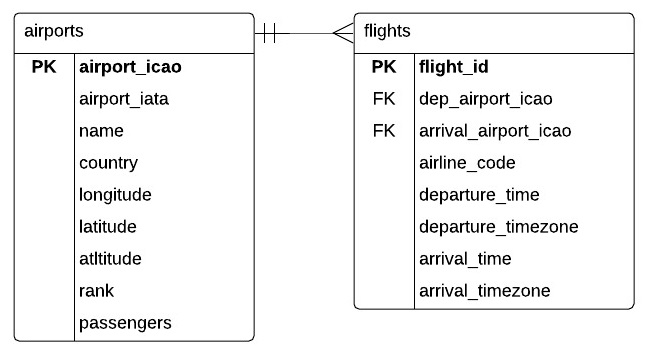

In [42]:
from IPython.display import Image
Image(r'C:\Users\anja\Downloads\ERmodel.jpg')

### Data Audit Process
#### Validity/Accuracy
To asses the validity and accuracy of our data, we used functions like isnull(), which confirmed that none of the values in our data were null. For most of our data, we didn't have to delete any rows or columns since none of the data we collected had any null values. Only one airport form our top 30 airports list had a missing value for half-year passengers, but we decided that the missing value was not critical enough to drop the entire row. If this was the case and relevant information like the ICAO code was missing, we woud've used the dropna() function to remove that row from the data set, or we would've found another website to scrape and provide that information.

Additionally, depending on which attribute we were looking at, we wrote tests to enure that they follow a standard form in order to determine their accuracy. For example, when looking at airport codes, we tested to make sure they were a 4-character string with letters only. We followed a similar procedure to test flight numbers, making sure they were alphanumeric strings that contained a total of 7 charactes. When looking at departure and arrival times for flights, we tested to make sure the hours were between 0 and 23, and minutes and seconds were between 0 and 59, since those those values correspond to a time. 

#### Completeness
To assess the completeness of our data, we used the info() function, which showed how many items each of our data columns contained. Since we knew how many rows of data we were importing, we were able to confirm that every column had the appropriate number of entries.

As described in the section above, we also used the isnull() function to make sure no null values were present in our data, which also served as comfirmation that all of our data was complete, and our rows and columns weren't just filled with empty values.

#### Consistency/Uniformity
We were also able to determine that our data was consistent and uniform by connecting items from the different data sets. For example, we used a web scraper and a csv file to collect airport information. From the web scraper, we were able to identify top 30 airports in the world and extract their rank and half-year traffic statistics. Then, we were able to use the airport ICAO code from the web scraper and match it agains the ICAO code of airports from the raw csv file, whichl ultimately enabled us to add a rank to the 30 top airports from the raw csv file.

These same ICAO could then be matched up against departure and arrival airport information from the flights data set we obtained through the API we used. We were able to narrow down the list of flights in our database by checking to make sure the arrival airport was on the list of top 30 airports by matching the airport ICAO codes. This also implied that our data was consistent and uniform across our data sets and across different data collection means.

### Report Summary

API Used: [aviationstack API](https://aviationstack.com/documentation)

Website Used: [Top 30 Airports in the World](https://www.world-airport-codes.com/world-top-30-airports.html)

.CSV File Used:[Open FLights Airport Data Set](https://openflights.org/data.html#airport)

Files Generated: top_airports.csv, flights.csv

In this assignment, we were able to demonstrate how data can be gathered from multiple sources and then analyzed and used to create a database. For the first part of the assignment, we made a web scraper to gather data on top 30 airports in the world. We specifically focused on getting the airport IATA code, rank, and half-year passenger count. For this portion of the assignment, we used functions like urlopen() and get() from the requests library to open and request information from the website. We used BeautifulSoup() to scrape the contents, followed by find_all() in order to find where the tags where the bulk of our data could be found. We additionally used to_numpy() function from the numpy library to get some of the data from data frame format into a list.

Next, for the raw csv file portion of the assignment, read_csv() to read the data in as a data frame. Following that, we used various attributes and functions like .shape and .head() to inspect our data. Aditionally, we used .is_null(), info(), and is_unique in order to audit our data for validity, completeness, and uniformity. We used the .drop() function to drop rows from our data that weren't related to the top 30 airports. We also used .merge() in order to merge our two data frames from the first 2 parts of the assignment.

Lastly, we used an API and the request() method from requests library to gather data from the aviationstack API. We converted the data into json format with the json() function, and then eventually into a data frame by storing it in a dictionary first. We once again used the functions described in the previous paragraph in order to audit our data.

In conclusion, through this assignment, we were able to learn how to gather data from multiple sources, and how to successfully manage and audit it in order to form a simple database with complete and accurate information.

### Contribution
On our own: 40%

External Source (TA sample and help): 20% (functions/attributes like .merge(), is_null(), is_unique, info(); image display)

External Source (online, cited below): 30% (various python data frame functions and attributes linked in the section below; we did not use the exact code provided, we only looked at examples of function use as well as descriptions of function attributes)

Provided by Professor:  10% (functions like urlopen(), BeautifulSoup(), find_all())

### Citations

https://aviationstack.com/documentation (API Documentation- help with creating API requests)

TA Assignment 1 Sample (audit functions like is_null(), info(), etc.; merge function; image display)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html (used as reference for dataframe functions used; drop(), merge(), rename(), loc(), .index)

https://www.world-airport-codes.com/world-top-30-airports.html (top 30 airports)

https://openflights.org/data.html#airport (open flights data)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html (exporting to csv file)

https://thispointer.com/python-pandas-how-to-create-dataframe-from-dictionary/ (converting dictionary to dataframe)

https://stackoverflow.com/questions/12329853/how-to-rearrange-pandas-column-sequence/23741704 (switch columns of dataframe)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html (dataframe to list)